# Sums
When we first learned about multiplication, we learned that we could write 
$$ 3 + 3 + 3 + 3 $$
more compactly as 
$$ 4 \times 3 $$

But what if we wanted to represent 
$$ 1 + 2 + 3 + 4 + 5 $$
This is where the sum notation comes in handy:
$$ \sum_{i=1}^{5} i $$
The sum symbol means that we are going to add up the variable i from 1 to 5.

In code we can implement sums using a for loop. Run the loop below to see the progress as we sum each number and the final answer. You'll notice that we must give the range function the number we want to start with and the number we want to sum to plus 1.

In [1]:
answer = 0
for i in range(1, 5+1):
    answer += i
    print('the value of answer this iteration: {}'.format(answer))
print('the final value of answer: {}'.format(answer))

the value of answer this iteration: 1
the value of answer this iteration: 3
the value of answer this iteration: 6
the value of answer this iteration: 10
the value of answer this iteration: 15
the final value of answer: 15


Let's try to code the following sum
$$ 1^2 + 2^2 + 3^2 + 4^2 + 5^2 + 6^2 + 7^2 + 8^2 +9^2 +10^2$$
which can be written as a sum
$$ \sum_{i=1}^{10}i^2 $$

In [2]:
answer = 0
for i in range(1,10+1):
    # put code here
print(answer)

IndentationError: expected an indented block (<ipython-input-2-04681a38ce59>, line 4)

# Some helper functions
You do not need to change anything below, just be sure to run the cell.

In [3]:
# Don't change these
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (
    Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
%matplotlib notebook

rate = 16000.
duration = 1
t = np.linspace(0., duration, int(rate * duration))


# Lets make a Synthesizer using Python.

Sound is made through pressure waves sent through the air. Using different wave patterns can help us to generate different sounds. For instance, we can see the results of four different waves below.

![Waves](waves.png)


All of these waves are functions of time and frequency. 

## Sin wave

$$ W (f,t) = \sin(2 \pi f t) $$

## Square wave

$$ W(f,t) = \sum_{i=1}^{1000} \frac{4}{\pi}\frac{1}{(2i -1)} \sin(2 \pi f t (2i -1)) $$

## Triangle wave

$$ W(f,t) = \sum_{i=1}^{1000} (-1^{i-1}) \frac{1}{(2i -1)^2} \sin(2 \pi f t (2i -1)) $$

## Saw wave

$$ W(f,t) = \sum_{i=1}^{1000} (-1^{i}) \frac{1}{\pi i} \sin(2 \pi f t i)) $$

Implement these functions using python below then we can give them a listen!


In [4]:
def sin(f,t):
    wave = # put code here
    return wave

def square(f,t):
    N = 1000
    wave = 0
    for i in range(1,N):
        # put code here
    return wave   
    
def triangle(f,t):
    N = 1000
    wave = 0
    for i in range(1,N):
        # put code here
    return wave    

def saw(f,t):
    N = 1000
    wave = 0
    for i in range(1,N):
        # put code here
    wave = 0.5 - wave
    return wave
       


SyntaxError: invalid syntax (<ipython-input-4-abf35350feb6>, line 2)

You can check your work by plotting with the cell block below. Don't worry about understanding these Python commands yet. The image should be similar to the one you saw above.

NameError: name 'sin' is not defined

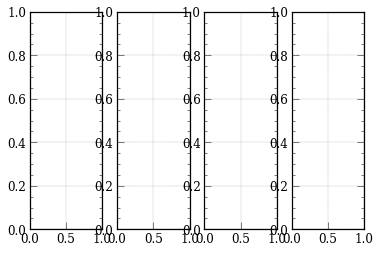

In [5]:
fig, ax = plt.subplots(1,4)
ax[0].plot(t,sin(2,t))
ax[0].set_title("Sin")
ax[1].plot(t,square(2,t))
ax[1].set_title("Square")
ax[2].plot(t,triangle(2,t))
ax[2].set_title("Triangle")
ax[3].plot(t,saw(2,t))
ax[3].set_title("Saw")
plt.tight_layout()
plt.show()

## The synthesizer.

the code below will take the 

In [ ]:
# DON'T CHANGE ANY OF THIS
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C']
waves = ["Sin","Square","Saw","Triangle"]


def generate_frequency(note_num,octave):
    note_num += 3
    
    offset = 12*(octave-1)
    note_num += offset
    
    return_freqs = 440. * 2**((note_num-49) / 12.)
    return return_freqs

layout = widgets.Layout(
    width='60px', height='120px',
    border='1px solid black')

radio = widgets.RadioButtons(
        options=waves,
        value=waves[0],
        description="Waveforms",
        disabled=False
    )

octave = widgets.IntSlider(
    value=4,
    min=1,
    max=8,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

buttons = []
for f, note in enumerate(notes):
    button = widgets.Button(description=note, layout=layout)
    def on_button_clicked(f, b):
        # When a button is clicked, we play the sound
        # in a dedicated Output widget.
        frequency = generate_frequency(f,octave.value)
        with widgets.Output():
            if radio.value == "Sin":
                waveform = sin(frequency,t)
            elif radio.value == "Square":
                waveform = square(frequency,t)
            elif radio.value == "Saw":
                waveform = saw(frequency,t)
            elif radio.value == "Triangle":
                waveform = triangle(frequency,t)
            display(Audio(waveform, rate=rate, autoplay=True))
                
    button.on_click(partial(on_button_clicked, f))
    buttons.append(button)
note_buttons = widgets.HBox(buttons)

# We place all buttons horizontally.
widgets.VBox([radio,note_buttons,octave])
# widgets.Box(children=buttons)